In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [190]:
df=pd.read_csv("data_p.csv")

In [191]:
df.head()

,Unnamed: 0,shipmode,sales,quantity,discount,profit,segment,region,state,subcategory,category,orderdate_day,orderdate_weekday,orderdate_month,orderdate_year,shipdate_day,shipdate_weekday,shipdate_month,shipdate_year,preparationtime
0,1,First Class,825.174,9,0.30,-117.8820,Corporate,Central,Illinois,Bookcases ...,Furniture,4,Sonntag,9,2016,6,Dienstag,9,2016,2
1,2,Standard Class,411.332,4,0.15,-4.8392,Consumer,West,California,Bookcases ...,Furniture,5,Freitag,9,2014,9,Dienstag,9,2014,4
2,3,Same Day,411.332,4,0.15,-4.8392,Home Office,West,California,Bookcases ...,Furniture,28,Donnerstag,11,2013,28,Donnerstag,11,2013,0
3,4,First Class,241.960,2,0.00,33.8744,Consumer,South,Louisiana,Bookcases ...,Furniture,30,Montag,5,2016,31,Dienstag,5,2016,1
4,5,Standard Class,341.960,2,0.00,78.6508,Home Office,East,Rhode Island,Bookcases ...,Furniture,31,Dienstag,12,2013,7,Dienstag,1,2014,7


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9994 non-null   int64  
 1   shipmode           9994 non-null   object 
 2   sales              9994 non-null   float64
 3   quantity           9994 non-null   int64  
 4   discount           9994 non-null   float64
 5   profit             9994 non-null   float64
 6   segment            9994 non-null   object 
 7   region             9994 non-null   object 
 8   state              9994 non-null   object 
 9   subcategory        9994 non-null   object 
 10  category           9994 non-null   object 
 11  orderdate_day      9994 non-null   int64  
 12  orderdate_weekday  9994 non-null   object 
 13  orderdate_month    9994 non-null   int64  
 14  orderdate_year     9994 non-null   int64  
 15  shipdate_day       9994 non-null   int64  
 16  shipdate_weekday   9994 

In [193]:
df.columns

Index(['Unnamed: 0', 'shipmode', 'sales', 'quantity', 'discount', 'profit',
       'segment', 'region', 'state', 'subcategory', 'category',
       'orderdate_day', 'orderdate_weekday', 'orderdate_month',
       'orderdate_year', 'shipdate_day', 'shipdate_weekday', 'shipdate_month',
       'shipdate_year', 'preparationtime'],
      dtype='object')

In [194]:
df=df[['sales', 'quantity', 'discount', 'profit', 'orderdate_month', 'shipdate_month','preparationtime']]

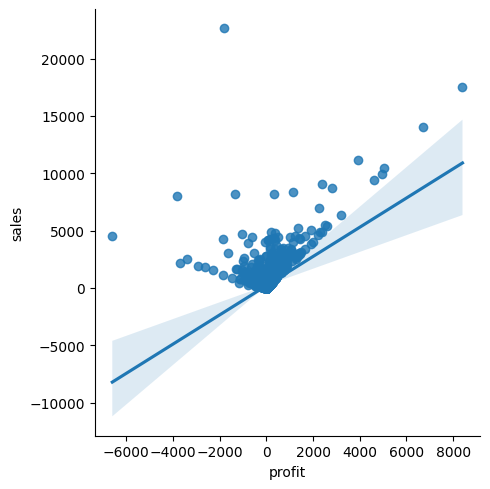

In [216]:
sns.lmplot(x="profit",y="sales",data=df)

<Axes: xlabel='profit', ylabel='sales'>

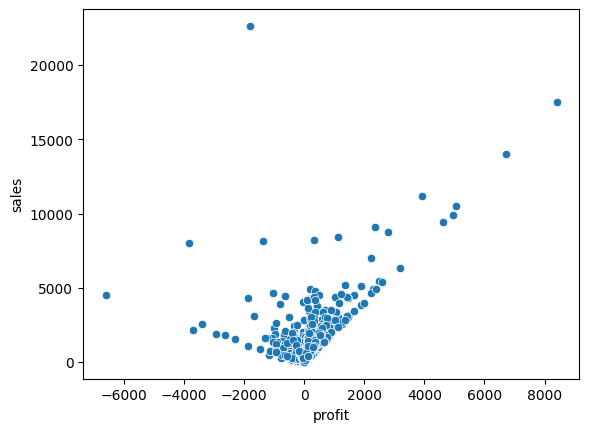

In [197]:
sns.scatterplot(x="profit",y="sales",data=df)

In [262]:
X=df.drop("sales",axis=1)

In [263]:
scaler=StandardScaler()

In [264]:
y=df["sales"]

In [265]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [266]:
model=LinearRegression()

In [267]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [268]:
y_pred=model.predict(X_test)

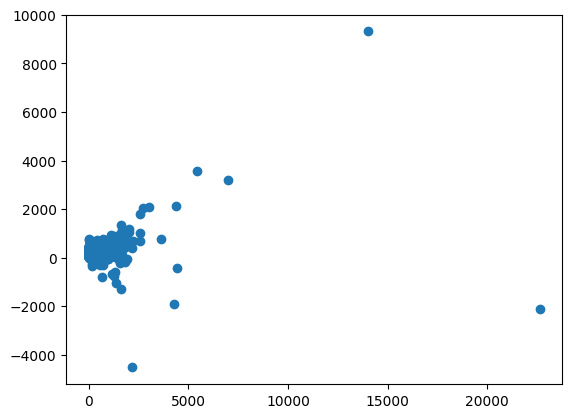

In [269]:
plt.scatter(y_test,y_pred)

In [270]:
coeffs=pd.DataFrame(model.coef_,X.columns)
coeffs.columns=["Coefficients"]
coeffs

,Coefficients
quantity,44.284053
discount,234.943597
profit,1.362553
orderdate_month,-2.256248
shipdate_month,3.768611
preparationtime,-2.667931


In [271]:
mse=mt.mean_squared_error(y_test,y_pred)
mae=mt.mean_absolute_error(y_test,y_pred)

In [272]:
print(f"Mean Squared Error: {np.sqrt(mse)}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 691.0297692187963
Mean Absolute Error: 224.86658376220282


In [273]:
print(f"Min percentage error: {((np.sqrt(mse)/df["sales"].max())*100).round(2)}")

Min percentage error: 3.05


In [274]:
print(f"Max percentage error: {((np.sqrt(mse)/df["sales"].min())*100).round(2)}")

Max percentage error: 155637.34


In [275]:
df["sales"].max()

np.float64(22638.48)

In [276]:
df["sales"].min()

np.float64(0.444)

In [277]:
df["sales"].nunique()

5825

In [278]:
df.loc[df["sales"]<=np.sqrt(mse),:]

,sales,quantity,discount,profit,orderdate_month,shipdate_month,preparationtime
1,411.332,4,0.15,-4.8392,9,9,4
2,411.332,4,0.15,-4.8392,11,11,0
3,241.960,2,0.00,33.8744,5,5,1
4,341.960,2,0.00,78.6508,12,1,7
5,359.058,3,0.30,-35.9058,3,3,3
...,...,...,...,...,...,...,...
9987,470.376,3,0.20,52.9173,7,7,4
9988,627.168,4,0.20,70.5564,5,5,0
9991,235.188,2,0.40,-43.1178,1,1,5
9992,391.980,2,0.00,113.6742,9,9,2


In [279]:
df.shape

(9994, 7)

In [215]:
model1=LinearRegression()